In [1]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [5]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [68]:
env.step(6)

(array([[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 False,
 None)

In [19]:
env.render()

|- - O|
|- O X|
|X X O|



In [8]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [9]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [10]:
env.render()

|- - X|
|- O -|
|- - -|



In [11]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [73]:
env.step((0,2))

ValueError: There is already a chess on position (0, 2).

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 False,
 None)

In [14]:
env.reward(player='X')

0

In [15]:
env.reward(player='O')

0

An example of finishing the game:

In [16]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [17]:
env.render()

|X X X|
|O O -|
|- - -|



In [18]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [19]:
env.reward(player='X')

1

In [20]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [21]:
env.reset();

In [14]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [23]:
opt_player.act(env.grid)

(2, 0)

In [24]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [2]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - X|
|- X O|
|X - -|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O -|
|- X O|
|- - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - O|
|- X O|
|X X X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|- O X|
|O - X|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|O X O|
|X O X|
|X O X|



### An example of optimal player playing against optimal player

In [1]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


NameError: name 'np' is not defined

### Q-Learning algorithm

In [3]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer
env = TictactoeEnv()

from collections import defaultdict
import random
class Q_Player:
    '''
    Description:
        A class to implement a Q-Learning optimal player in Tic-tac-toe.

    Parameters:
        epsilon: float, in [0, 1]. This is a value between 0-1 that indicates the
            probability of making a random action instead of the optimal action
            at any given time.
        alpha: float, in [0, 1]. This is the learning rate
        gamma: float, in [0, 1]. This is the discount factor

    '''
    def __init__(self, epsilon=0.2, player='X'):
        self.epsilon = epsilon
        self.player = player # 'x' or 'O'
#         self.qvals = qvals # q values for each state
#         self.assignment = assignment # id to label different grids

    def set_player(self, player = 'X', j=-1):
        self.player = player
        if j != -1:
            self.player = 'X' if j % 2 == 0 else 'O'

    def empty(self, grid):
        '''return all empty positions'''
        avail = []
        for i in range(9):
            pos = (int(i/3), i % 3)
            if grid[pos] == 0:
                avail.append(pos)
        return avail
    
    def eps_greedyMove(self, grid, assignment, qvals, val = None):
        """ Return the move with the optimal Q-value according to a epsilon-greedy policy. """
        self.qvals = qvals
        self.assignment = assignment
        grid_id = self.assignment[str(grid)]
        positions = np.full(9, True)
        if val is None:
            val = 1 if self.player == 'X' else -1
        for pos in self.empty(grid):
            grid_ = np.copy(grid)
            grid_[pos] = val            
            action = convert(pos)
            positions[action] = False
#             next_grid_id = self.assignment[str(grid_)]
#             if next_grid_id not in self.neighbours:
#                 self.neighbours[grid_id].append(next_grid_id)
        if random.random() < self.epsilon:
            move = self.randomMove(grid)
            return move
        else:
            self.qvals[grid_id][positions] = np.nan
            best_move = int(np.nanargmax(self.qvals[grid_id]))
            return best_move
        
    def return_dicts(self):
        return self.assignment, self.qvals

    def randomMove(self, grid):
        """ Chose a random move from the available options. """
        avail = self.empty(grid)
        return avail[random.randint(0, len(avail)-1)]

    def act(self, grid, assignment, qvals, **kwargs):
        """
        Goes through a hierarchy of moves, making the best move that
        is currently available each time (with probabitity 1-self.epsilon).
        A touple is returned that represents (row, col).
        """
        return self.eps_greedyMove(grid, assignment, qvals)

In [4]:
def convert(move):
    """
    Convert a move in the tuple format to the int format
    """
    if type(move) != tuple:
        return move
    else:
        return (move[0]*3 + move[1] % 3)

In [ ]:
results = []
for i in range(1):
    Turns = np.array(['X','O'])
    n_games = 20000
    winners = []
    count = []
    id_ = 0
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
    for i in range(n_games):
        print(i)
        env.reset()
        grid, _, __ = env.observe()
        player_opt_1 = OptimalPlayer(epsilon=0.5, player=Turns[i%2])
        player_q = Q_Player(epsilon=0.5, player=Turns[1 - i%2])
        print("Q IS " + Turns[1 - i%2])
        for j in range(9):
#             if (env.current_player == player_q.player):
#                 print("q playing...")
#             else:
#                 print("opt playing...")
#             print("current player: "+ env.current_player, "\nGrid"+str(prev_grid)+"\n", + grid)
            if env.current_player == player_opt_1.player:
                move = player_opt_1.act(grid)
                grid, end, winner = env.step(move, print_grid=False)
                if j!=0:
                    qvals[last_grid_q][last_move_q] += alpha*(gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q][last_move_q])
            else:
                move = player_q.act(grid, assignments, qvals)
                assignments, qvals = player_q.return_dicts()
                last_move_q = convert(move)
                last_grid_q = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)
#             print(env.current_player, " is about to play on ",assignments[str(grid)])
#             print(assignments[str(grid)],"\n",grid)
#             move = convert(move)
#             current_grid = assignments[str(grid)]
            if end:
                winners.append(winner)
                if winner == player_q.player:
                    count.append(1)
                    qvals[last_grid_q][last_move_q] += alpha*(1 + gamma*(0 - qvals[last_grid_q][last_move_q]))
                else:
                    count.append(0)
                    qvals[last_grid_q][last_move_q] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*(0 - qvals[last_grid_q][last_move_q]))
    #             print('-------------------------------------------')
    #             print('Game end, winner is player ' + str(winner))
    #             print('Optimal player 1 = ' +  Turns[i%2])
    #             print('Q player 2 = ' +  Turns[1-i%2])
                env.render()
                env.reset()
#                 print(qvals)
                break
#             else:
#                 if env.current_player != player_q.player: # Here we update if the current player is not the Q-player
#                                                           # which is equivalent to say that Q-player has just played
#                     next_states, assignments, qvals = compute_next_states(grid, assignments, player_opt_1.player, qvals)
#                     qvals[last_grid_q][last_move_q] += alpha*(gamma*np.nanmax(next_states) - qvals[last_grid_q][last_move_q]) # here R = 0
results.append(count)

0
Q IS O
|X O X|
|O O -|
|X O X|

1
Q IS X
|X X O|
|- O X|
|O - -|

2
Q IS O
|O X O|
|O X O|
|X X X|

3
Q IS X
|X - O|
|- O -|
|O X X|

4
Q IS O
|O X X|
|X O O|
|O X X|

5
Q IS X
|X X X|
|- - O|
|X O O|

6
Q IS O
|X O O|
|X - X|
|X O -|

7
Q IS X
|X X X|
|X O -|
|O - O|

8
Q IS O
|O X O|
|- - O|
|X X X|

9
Q IS X
|O O X|
|- X O|
|X X -|

10
Q IS O
|O O -|
|X X X|
|- - -|

11
Q IS X
|X X X|
|- O O|
|- - -|

12
Q IS O
|O O X|
|O X X|
|X - -|

13
Q IS X
|X X O|
|O X X|
|X O O|

14
Q IS O
|O X -|
|- X -|
|O X -|

15
Q IS X
|X O X|
|O X X|
|X O O|

16
Q IS O
|O O X|
|- X -|
|X - -|

17
Q IS X
|X X X|
|- - -|
|- O O|

18
Q IS O
|O O X|
|- O -|
|X X X|

19
Q IS X
|X X O|
|X - O|
|- - O|

20
Q IS O
|X O -|
|O O -|
|X X X|

21
Q IS X
|X X X|
|O - O|
|X - O|

22
Q IS O
|O O X|
|O X X|
|- - X|

23
Q IS X
|X O O|
|X X X|
|O O X|

24
Q IS O
|O - -|
|O O X|
|X X X|

25
Q IS X
|X X O|
|X O -|
|O - -|

26
Q IS O
|O O O|
|- X X|
|- - X|

27
Q IS X
|X - O|
|O O X|
|O X X|

28
Q IS O
|X O O|
|X X X|
|- -

|O - X|
|O - X|
|- - X|

233
Q IS X
|X X X|
|O - -|
|- O -|

234
Q IS O
|O O X|
|- X X|
|- O X|

235
Q IS X
|X O X|
|O O X|
|X X O|

236
Q IS O
|X O O|
|X - -|
|X - -|

237
Q IS X
|X - O|
|X O X|
|O - -|

238
Q IS O
|X O -|
|- X -|
|O - X|

239
Q IS X
|X X O|
|- O X|
|O - -|

240
Q IS O
|O O -|
|X X X|
|- O X|

241
Q IS X
|X X O|
|- O -|
|O - X|

242
Q IS O
|O O O|
|- X -|
|- X X|

243
Q IS X
|X X O|
|X O O|
|X - -|

244
Q IS O
|O O X|
|- O X|
|X - X|

245
Q IS X
|X X X|
|- O -|
|- O -|

246
Q IS O
|O X O|
|O X X|
|X O X|

247
Q IS X
|X - X|
|X O X|
|O O O|

248
Q IS O
|O X -|
|- X -|
|- X O|

249
Q IS X
|X O O|
|X O -|
|O X X|

250
Q IS O
|O - X|
|X X O|
|X - O|

251
Q IS X
|X O X|
|X - O|
|X - O|

252
Q IS O
|O O X|
|X X O|
|O X X|

253
Q IS X
|X X X|
|O - -|
|- - O|

254
Q IS O
|X X X|
|X O O|
|O O X|

255
Q IS X
|X X O|
|X - O|
|- - O|

256
Q IS O
|O - X|
|O X X|
|- O X|

257
Q IS X
|X X O|
|O X X|
|O O X|

258
Q IS O
|O - O|
|O X -|
|X X X|

259
Q IS X
|X X O|
|O O X|
|X O X|

260

|X O X|
|X O X|
|- O O|

464
Q IS O
|O - X|
|- X O|
|X - -|

465
Q IS X
|X O X|
|- O X|
|- O -|

466
Q IS O
|O O O|
|X - X|
|- X -|

467
Q IS X
|X X X|
|- O -|
|O X O|

468
Q IS O
|X O -|
|- X -|
|O - X|

469
Q IS X
|X X O|
|- O X|
|O - -|

470
Q IS O
|X X -|
|O X -|
|O X O|

471
Q IS X
|X X X|
|O O X|
|O - -|

472
Q IS O
|O O X|
|X X O|
|O X X|

473
Q IS X
|X X X|
|- O -|
|- O -|

474
Q IS O
|X O O|
|O O X|
|X X X|

475
Q IS X
|X X X|
|O O -|
|- - -|

476
Q IS O
|O O O|
|X - X|
|- - X|

477
Q IS X
|X X O|
|- O X|
|O - -|

478
Q IS O
|O X X|
|O - X|
|O - -|

479
Q IS X
|X X O|
|- O -|
|O X -|

480
Q IS O
|O O X|
|- O X|
|- X X|

481
Q IS X
|X O O|
|- O X|
|X O X|

482
Q IS O
|O O X|
|- X O|
|X X -|

483
Q IS X
|X O O|
|X O X|
|X X O|

484
Q IS O
|X - -|
|O X O|
|- - X|

485
Q IS X
|X O X|
|X X O|
|O X O|

486
Q IS O
|X O -|
|- X -|
|- O X|

487
Q IS X
|X O X|
|O O X|
|X X O|

488
Q IS O
|O - X|
|- X O|
|X - -|

489
Q IS X
|X X O|
|- X O|
|- - O|

490
Q IS O
|O X O|
|O X X|
|X O X|

491

|X X O|
|- O O|
|O X X|

692
Q IS O
|O O O|
|- X -|
|X - X|

693
Q IS X
|X X X|
|- O O|
|X O -|

694
Q IS O
|X O X|
|O O O|
|- X X|

695
Q IS X
|O X O|
|O X X|
|X O X|

696
Q IS O
|X O -|
|X X -|
|X O O|

697
Q IS X
|X O -|
|X O -|
|X - -|

698
Q IS O
|O - -|
|X X X|
|O O X|

699
Q IS X
|X X O|
|O O X|
|X O X|

700
Q IS O
|- X O|
|O X -|
|X X O|

701
Q IS X
|X X X|
|O O -|
|- - -|

702
Q IS O
|O X -|
|- X -|
|O X -|

703
Q IS X
|X X O|
|O X X|
|X O O|

704
Q IS O
|X O O|
|- X X|
|- O X|

705
Q IS X
|X X O|
|O X O|
|X O X|

706
Q IS O
|O X X|
|O X -|
|O - -|

707
Q IS X
|X X O|
|O O O|
|X - X|

708
Q IS O
|X O O|
|O X X|
|X X O|

709
Q IS X
|X X O|
|O X X|
|O X O|

710
Q IS O
|O O O|
|- X -|
|X X -|

711
Q IS X
|O X X|
|X O O|
|O X X|

712
Q IS O
|O X X|
|O O X|
|X O X|

713
Q IS X
|X O X|
|X X O|
|O X O|

714
Q IS O
|O - X|
|- X O|
|X - -|

715
Q IS X
|O X X|
|X O -|
|- - O|

716
Q IS O
|O X O|
|O X X|
|X X O|

717
Q IS X
|X O X|
|X O O|
|O X X|

718
Q IS O
|O O -|
|X X X|
|- - -|

719

|X X O|
|- O -|
|O X -|

920
Q IS O
|O X O|
|O X -|
|X X -|

921
Q IS X
|O - -|
|X O O|
|X X X|

922
Q IS O
|O X -|
|- X O|
|- X -|

923
Q IS X
|X X X|
|- O O|
|- - -|

924
Q IS O
|O - X|
|O X -|
|X - -|

925
Q IS X
|X O X|
|X O O|
|O X X|

926
Q IS O
|X X X|
|O - -|
|O - -|

927
Q IS X
|X X X|
|- O -|
|O - -|

928
Q IS O
|O O -|
|- - -|
|X X X|

929
Q IS X
|X X O|
|X O X|
|O O -|

930
Q IS O
|- O X|
|- - X|
|O - X|

931
Q IS X
|X X O|
|O O X|
|X X O|

932
Q IS O
|O - X|
|- X O|
|X X O|

933
Q IS X
|X X O|
|O O X|
|X X O|

934
Q IS O
|O O O|
|- X X|
|- - X|

935
Q IS X
|X X X|
|- O -|
|- O -|

936
Q IS O
|O O X|
|O X O|
|X X X|

937
Q IS X
|X X O|
|- O X|
|O X O|

938
Q IS O
|O - X|
|O O X|
|- X X|

939
Q IS X
|X X O|
|X - O|
|- - O|

940
Q IS O
|O X O|
|O X O|
|X X X|

941
Q IS X
|X O X|
|X O -|
|- O -|

942
Q IS O
|O - X|
|- X -|
|X - O|

943
Q IS X
|O X O|
|X O X|
|X O X|

944
Q IS O
|O X X|
|X O O|
|X O X|

945
Q IS X
|X X O|
|- O X|
|O - -|

946
Q IS O
|O X O|
|O X -|
|- X X|

947

|X O X|
|O O X|
|X X O|

1154
Q IS O
|O X -|
|- X O|
|- X -|

1155
Q IS X
|X X O|
|O O X|
|X O X|

1156
Q IS O
|X - X|
|O O X|
|O - X|

1157
Q IS X
|X X X|
|- O -|
|- - O|

1158
Q IS O
|O O X|
|- X O|
|X - X|

1159
Q IS X
|X - O|
|X O O|
|O X X|

1160
Q IS O
|O O X|
|X X O|
|O X X|

1161
Q IS X
|O X O|
|X O O|
|X X X|

1162
Q IS O
|X O O|
|X X O|
|X - -|

1163
Q IS X
|X X X|
|- O O|
|O X -|

1164
Q IS O
|X O X|
|O X X|
|O X O|

1165
Q IS X
|X X O|
|- O -|
|O - X|

1166
Q IS O
|- O X|
|- X O|
|X - -|

1167
Q IS X
|X - O|
|X O X|
|X - O|

1168
Q IS O
|O - X|
|O X O|
|X - X|

1169
Q IS X
|X X -|
|- X -|
|O O O|

1170
Q IS O
|O O X|
|- - X|
|- - X|

1171
Q IS X
|X - O|
|X O X|
|O O X|

1172
Q IS O
|O O X|
|- O -|
|X X X|

1173
Q IS X
|X - O|
|X O -|
|O - X|

1174
Q IS O
|O X -|
|O X X|
|O - -|

1175
Q IS X
|X X O|
|X - O|
|- - O|

1176
Q IS O
|O O O|
|X O X|
|X - X|

1177
Q IS X
|X O X|
|X X O|
|O X O|

1178
Q IS O
|- O O|
|X X X|
|- - -|

1179
Q IS X
|X X O|
|X O O|
|X - -|

1180
Q IS O
|

|X O X|
|X X O|
|O X O|

1376
Q IS O
|X O O|
|X O -|
|O X X|

1377
Q IS X
|X O X|
|X O O|
|O X X|

1378
Q IS O
|O X O|
|O X X|
|X O X|

1379
Q IS X
|X X O|
|O O X|
|X O X|

1380
Q IS O
|X X O|
|- X O|
|- - O|

1381
Q IS X
|X X X|
|O - -|
|- - O|

1382
Q IS O
|O O X|
|X O X|
|O X X|

1383
Q IS X
|X X O|
|O O X|
|X O X|

1384
Q IS O
|O O X|
|X O X|
|X - O|

1385
Q IS X
|X X O|
|- O -|
|O X -|

1386
Q IS O
|O O -|
|O X -|
|X X X|

1387
Q IS X
|X - -|
|O O O|
|- X X|

1388
Q IS O
|O X O|
|X X X|
|X O O|

1389
Q IS X
|O - X|
|X O -|
|X - O|

1390
Q IS O
|O O X|
|X X O|
|O X X|

1391
Q IS X
|X X O|
|X O X|
|O O -|

1392
Q IS O
|O O X|
|X X O|
|O X X|

1393
Q IS X
|X X X|
|O - -|
|- - O|

1394
Q IS O
|O X O|
|X O X|
|- X O|

1395
Q IS X
|X - O|
|X O -|
|X - -|

1396
Q IS O
|O X O|
|X X X|
|O O X|

1397
Q IS X
|X X O|
|X O O|
|X - -|

1398
Q IS O
|- O X|
|- X -|
|X O -|

1399
Q IS X
|O X X|
|X O -|
|- - O|

1400
Q IS O
|X O -|
|O X -|
|- - X|

1401
Q IS X
|X X O|
|O O X|
|X X O|

1402
Q IS O
|

|X O O|
|O X -|
|- X X|

1611
Q IS X
|X - O|
|- X O|
|- X O|

1612
Q IS O
|O O X|
|X X O|
|O X X|

1613
Q IS X
|X - O|
|- X O|
|X - O|

1614
Q IS O
|X - -|
|- X -|
|O O X|

1615
Q IS X
|X - O|
|X O -|
|O X -|

1616
Q IS O
|O O X|
|O - -|
|X X X|

1617
Q IS X
|X - O|
|X X X|
|O O -|

1618
Q IS O
|O O X|
|X O X|
|O X X|

1619
Q IS X
|X - O|
|- X O|
|X - O|

1620
Q IS O
|O O X|
|X X O|
|O X X|

1621
Q IS X
|X X O|
|- O X|
|O - -|

1622
Q IS O
|O X X|
|O O X|
|- - X|

1623
Q IS X
|X - O|
|- O X|
|O X -|

1624
Q IS O
|O O X|
|O X X|
|- - X|

1625
Q IS X
|X O X|
|O X O|
|O X X|

1626
Q IS O
|O O X|
|X X O|
|X X O|

1627
Q IS X
|X X O|
|X O O|
|X - -|

1628
Q IS O
|X O -|
|O X -|
|- - X|

1629
Q IS X
|X X X|
|O O X|
|O O X|

1630
Q IS O
|O X O|
|O O X|
|X X X|

1631
Q IS X
|X X X|
|- O -|
|- - O|

1632
Q IS O
|O O O|
|X X -|
|X X O|

1633
Q IS X
|X O X|
|X O X|
|O X O|

1634
Q IS O
|O X O|
|O X X|
|X O X|

1635
Q IS X
|O O O|
|- X -|
|X - X|

1636
Q IS O
|O O -|
|- - -|
|X X X|

1637
Q IS X
|

|X O -|
|X - -|
|X O -|

1843
Q IS X
|X X O|
|- O -|
|O - X|

1844
Q IS O
|O O O|
|- X X|
|X - -|

1845
Q IS X
|X O X|
|X O O|
|O X X|

1846
Q IS O
|X O O|
|O X X|
|- - X|

1847
Q IS X
|X X O|
|- - O|
|X - O|

1848
Q IS O
|O X O|
|X O O|
|X X X|

1849
Q IS X
|X O X|
|O O O|
|X X -|

1850
Q IS O
|O - X|
|- O X|
|- - X|

1851
Q IS X
|X O X|
|X - -|
|X O O|

1852
Q IS O
|X - -|
|O X -|
|O - X|

1853
Q IS X
|X O O|
|X O X|
|O - X|

1854
Q IS O
|O - X|
|- - X|
|- O X|

1855
Q IS X
|X O -|
|- O X|
|- O X|

1856
Q IS O
|- O X|
|O X -|
|X - -|

1857
Q IS X
|X X O|
|O X X|
|O X O|

1858
Q IS O
|O O X|
|X O O|
|X X X|

1859
Q IS X
|X X O|
|X O X|
|O - O|

1860
Q IS O
|O O O|
|- X X|
|X O X|

1861
Q IS X
|O X X|
|O O -|
|O X X|

1862
Q IS O
|O - X|
|- X -|
|X - O|

1863
Q IS X
|X X O|
|X X -|
|O O O|

1864
Q IS O
|O X -|
|- X -|
|O X -|

1865
Q IS X
|X X X|
|- O -|
|- - O|

1866
Q IS O
|O X O|
|X O X|
|X O X|

1867
Q IS X
|X X O|
|O O X|
|X X O|

1868
Q IS O
|O - O|
|- - -|
|X X X|

1869
Q IS X
|

|O - X|
|- X -|
|X - O|

2081
Q IS X
|X O X|
|X O O|
|O X X|

2082
Q IS O
|O X O|
|X O -|
|O X X|

2083
Q IS X
|X O X|
|X O X|
|O X O|

2084
Q IS O
|O X X|
|O X O|
|O - X|

2085
Q IS X
|O X -|
|O X X|
|O - -|

2086
Q IS O
|O O X|
|O X O|
|X X X|

2087
Q IS X
|X O -|
|X O -|
|X - -|

2088
Q IS O
|O X -|
|O X O|
|X X -|

2089
Q IS X
|X X O|
|X O O|
|X - -|

2090
Q IS O
|O X X|
|O O X|
|X - O|

2091
Q IS X
|X X O|
|O O X|
|X O X|

2092
Q IS O
|- X -|
|- X -|
|O X O|

2093
Q IS X
|X - O|
|X O -|
|O X -|

2094
Q IS O
|O X O|
|X X X|
|X O O|

2095
Q IS X
|X X O|
|X O O|
|X O X|

2096
Q IS O
|O O -|
|X X X|
|O X -|

2097
Q IS X
|X X O|
|O O X|
|X X O|

2098
Q IS O
|O X O|
|O X X|
|X O X|

2099
Q IS X
|X X O|
|- O -|
|O - X|

2100
Q IS O
|X - O|
|X X O|
|- - O|

2101
Q IS X
|X O X|
|- O -|
|- O X|

2102
Q IS O
|O - X|
|O X O|
|O X X|

2103
Q IS X
|X X O|
|- O X|
|O - -|

2104
Q IS O
|X O O|
|O O X|
|X X X|

2105
Q IS X
|X - O|
|X O -|
|O X -|

2106
Q IS O
|O O X|
|X X O|
|X O X|

2107
Q IS X
|

|X O X|
|X O O|
|O X X|

2314
Q IS O
|X O O|
|O X -|
|- X X|

2315
Q IS X
|X X O|
|- O -|
|O X -|

2316
Q IS O
|O O X|
|- - O|
|X X X|

2317
Q IS X
|O O O|
|- X X|
|X O X|

2318
Q IS O
|O X -|
|O X -|
|- X -|

2319
Q IS X
|X X X|
|- - O|
|O - -|

2320
Q IS O
|O O X|
|X O X|
|O X X|

2321
Q IS X
|X X X|
|- O -|
|- O -|

2322
Q IS O
|O O X|
|X - X|
|- O X|

2323
Q IS X
|X X X|
|- O O|
|- - -|

2324
Q IS O
|O - X|
|O - X|
|X O X|

2325
Q IS X
|X - O|
|- O -|
|O X X|

2326
Q IS O
|O - X|
|- X X|
|O O X|

2327
Q IS X
|X - O|
|- X O|
|- X O|

2328
Q IS O
|O X O|
|O X X|
|X O X|

2329
Q IS X
|X X X|
|O O X|
|X O O|

2330
Q IS O
|O X O|
|X O X|
|X - O|

2331
Q IS X
|X X O|
|- O -|
|O - X|

2332
Q IS O
|O O X|
|X - X|
|O - X|

2333
Q IS X
|O X O|
|X O X|
|O - X|

2334
Q IS O
|O - X|
|O X X|
|- O X|

2335
Q IS X
|X X O|
|X O X|
|O O -|

2336
Q IS O
|O O O|
|- X X|
|- - X|

2337
Q IS X
|X - X|
|O O O|
|O X X|

2338
Q IS O
|O - X|
|- - X|
|O - X|

2339
Q IS X
|X X X|
|- O -|
|O - -|

2340
Q IS O
|

|X X X|
|- O X|
|O O -|

2550
Q IS O
|X O O|
|X - -|
|X X O|

2551
Q IS X
|X O X|
|O O O|
|- X X|

2552
Q IS O
|X X X|
|- - -|
|- O O|

2553
Q IS X
|X X O|
|X O O|
|X O X|

2554
Q IS O
|X O X|
|O O X|
|X O -|

2555
Q IS X
|O - X|
|X O -|
|X - O|

2556
Q IS O
|O O -|
|X O -|
|X X X|

2557
Q IS X
|X X -|
|X O X|
|O O O|

2558
Q IS O
|O - -|
|- - O|
|X X X|

2559
Q IS X
|O O X|
|X O -|
|X X O|

2560
Q IS O
|O - -|
|O X O|
|X X X|

2561
Q IS X
|X O X|
|O O X|
|X X O|

2562
Q IS O
|O O X|
|X X O|
|X - -|

2563
Q IS X
|X X X|
|- O O|
|- - -|

2564
Q IS O
|O X X|
|X X O|
|O O X|

2565
Q IS X
|X X X|
|X O -|
|O - O|

2566
Q IS O
|O O -|
|X X X|
|- X O|

2567
Q IS X
|X O X|
|O O X|
|X X O|

2568
Q IS O
|O X O|
|X X O|
|X O X|

2569
Q IS X
|X O -|
|- O X|
|X O -|

2570
Q IS O
|X O O|
|- X -|
|X O X|

2571
Q IS X
|- O X|
|X O -|
|X O -|

2572
Q IS O
|X O X|
|O X X|
|O X O|

2573
Q IS X
|X X X|
|- O O|
|- O X|

2574
Q IS O
|X - O|
|O X -|
|- - X|

2575
Q IS X
|X - -|
|X - X|
|O O O|

2576
Q IS O
|

|O O -|
|X X X|
|- O X|

2773
Q IS X
|X X O|
|- X O|
|- O X|

2774
Q IS O
|X O -|
|- X -|
|- O X|

2775
Q IS X
|X X O|
|O O X|
|O X -|

2776
Q IS O
|X O X|
|X O O|
|O X X|

2777
Q IS X
|X - O|
|X O -|
|X - -|

2778
Q IS O
|O O O|
|X X O|
|- X X|

2779
Q IS X
|X X O|
|O O X|
|X O X|

2780
Q IS O
|X O O|
|O X -|
|- X X|

2781
Q IS X
|X O X|
|X O O|
|O X X|

2782
Q IS O
|O X X|
|X X O|
|O O X|

2783
Q IS X
|O X -|
|- X -|
|- X O|

2784
Q IS O
|O O X|
|- X X|
|X O -|

2785
Q IS X
|X X O|
|- O -|
|O X -|

2786
Q IS O
|O X X|
|- X -|
|X O O|

2787
Q IS X
|O X X|
|- O X|
|X O O|

2788
Q IS O
|O X -|
|O O X|
|X X O|

2789
Q IS X
|O X -|
|- O -|
|X X O|

2790
Q IS O
|O X X|
|O X -|
|O - -|

2791
Q IS X
|X X O|
|- - O|
|- X O|

2792
Q IS O
|O - X|
|O - O|
|X X X|

2793
Q IS X
|X X O|
|- X -|
|O X O|

2794
Q IS O
|O X O|
|O X X|
|X O X|

2795
Q IS X
|X O X|
|X O X|
|O X O|

2796
Q IS O
|X O O|
|X X X|
|- O -|

2797
Q IS X
|X X O|
|O X O|
|- X -|

2798
Q IS O
|O X X|
|O X X|
|O - O|

2799
Q IS X
|

|X O O|
|- X O|
|X X O|

3003
Q IS X
|X O O|
|O O X|
|X X X|

3004
Q IS O
|X O X|
|O X X|
|O X O|

3005
Q IS X
|O O O|
|X X O|
|- X X|

3006
Q IS O
|O O X|
|X O O|
|X X X|

3007
Q IS X
|O X X|
|- O O|
|X X O|

3008
Q IS O
|X X O|
|- X -|
|O X O|

3009
Q IS X
|X X X|
|O O X|
|- O -|

3010
Q IS O
|O O X|
|X X -|
|X O -|

3011
Q IS X
|X X O|
|- X O|
|X O O|

3012
Q IS O
|X O O|
|O X X|
|X X O|

3013
Q IS X
|X X O|
|O X O|
|X O X|

3014
Q IS O
|- - X|
|- X O|
|X O -|

3015
Q IS X
|X O X|
|- O -|
|X O -|

3016
Q IS O
|O X O|
|O X X|
|X O X|

3017
Q IS X
|X X O|
|X O O|
|X O X|

3018
Q IS O
|X O O|
|X - -|
|X X O|

3019
Q IS X
|X O O|
|X - -|
|X X O|

3020
Q IS O
|O X X|
|X X O|
|O X O|

3021
Q IS X
|- X X|
|O O O|
|O X X|

3022
Q IS O
|X O O|
|O X X|
|X X O|

3023
Q IS X
|X X O|
|O X X|
|X O O|

3024
Q IS O
|X X O|
|O O O|
|X X -|

3025
Q IS X
|X O X|
|X O X|
|O O -|

3026
Q IS O
|X X O|
|O X X|
|X O O|

3027
Q IS X
|X X O|
|O O X|
|X O X|

3028
Q IS O
|- X -|
|- X O|
|O X -|

3029
Q IS X
|

|X X O|
|X O -|
|X O -|

3230
Q IS O
|O - -|
|X X X|
|O - -|

3231
Q IS X
|X O O|
|O O X|
|X X X|

3232
Q IS O
|- O X|
|O X -|
|X - -|

3233
Q IS X
|X X O|
|X O -|
|O - -|

3234
Q IS O
|O - X|
|- X -|
|X O -|

3235
Q IS X
|X - O|
|X O O|
|X X -|

3236
Q IS O
|X O X|
|O - X|
|O - X|

3237
Q IS X
|O X -|
|X O -|
|X - O|

3238
Q IS O
|O X O|
|X X O|
|X O X|

3239
Q IS X
|X X X|
|O O -|
|X O -|

3240
Q IS O
|X O X|
|- O -|
|X O -|

3241
Q IS X
|X O X|
|X X O|
|X O O|

3242
Q IS O
|X - O|
|O X X|
|O - X|

3243
Q IS X
|X X X|
|O - -|
|O O X|

3244
Q IS O
|- O O|
|X X X|
|O X -|

3245
Q IS X
|O - X|
|O - X|
|O X -|

3246
Q IS O
|O X O|
|O X X|
|X O X|

3247
Q IS X
|X X O|
|O O X|
|X X O|

3248
Q IS O
|X O X|
|X O O|
|O X X|

3249
Q IS X
|X X O|
|- X -|
|O O X|

3250
Q IS O
|X O O|
|X X X|
|O X O|

3251
Q IS X
|O X -|
|- X -|
|O X -|

3252
Q IS O
|O X O|
|O X X|
|X O X|

3253
Q IS X
|X X O|
|X O -|
|X O -|

3254
Q IS O
|O - X|
|O X -|
|X - -|

3255
Q IS X
|X X X|
|O - O|
|- - -|

3256
Q IS O
|

|X X O|
|O O X|
|X X O|

3474
Q IS O
|O - X|
|- - X|
|- O X|

3475
Q IS X
|X X O|
|- X O|
|- O X|

3476
Q IS O
|O X O|
|O X X|
|X O X|

3477
Q IS X
|X O X|
|X O O|
|O X X|

3478
Q IS O
|O O X|
|X X O|
|O X X|

3479
Q IS X
|X O X|
|X O X|
|O X O|

3480
Q IS O
|O O -|
|X X X|
|- - -|

3481
Q IS X
|X X O|
|O O X|
|X O X|

3482
Q IS O
|O X X|
|- X -|
|O X O|

3483
Q IS X
|X - O|
|X O -|
|X O X|

3484
Q IS O
|O X X|
|- X -|
|O X O|

3485
Q IS X
|X O X|
|- X -|
|O O X|

3486
Q IS O
|O O X|
|X X O|
|X - -|

3487
Q IS X
|X X X|
|- O -|
|- - O|

3488
Q IS O
|O O X|
|X O X|
|- - X|

3489
Q IS X
|X X X|
|- O -|
|O - -|

3490
Q IS O
|- - X|
|O O X|
|- - X|

3491
Q IS X
|X X X|
|- O O|
|O - X|

3492
Q IS O
|O - X|
|- X -|
|X - O|

3493
Q IS X
|X X X|
|X O -|
|- O O|

3494
Q IS O
|O O X|
|X X O|
|X O X|

3495
Q IS X
|X O X|
|O O O|
|- X X|

3496
Q IS O
|O X O|
|- - O|
|X X X|

3497
Q IS X
|X O X|
|- O -|
|X O -|

3498
Q IS O
|O - -|
|- - O|
|X X X|

3499
Q IS X
|X - -|
|X O -|
|X - O|

3500
Q IS O
|

|X X X|
|X O -|
|O O -|

3710
Q IS O
|X O -|
|O X X|
|- O X|

3711
Q IS X
|X O O|
|O X X|
|X X O|

3712
Q IS O
|O X X|
|O O X|
|X O X|

3713
Q IS X
|- - O|
|X O X|
|O X -|

3714
Q IS O
|O - X|
|- O X|
|X O X|

3715
Q IS X
|X O X|
|X X O|
|X O O|

3716
Q IS O
|O X X|
|X O O|
|X O X|

3717
Q IS X
|X X O|
|X O X|
|X O O|

3718
Q IS O
|O O X|
|O X X|
|X X O|

3719
Q IS X
|X X -|
|O O O|
|X - -|

3720
Q IS O
|X O O|
|X X O|
|O X X|

3721
Q IS X
|X X O|
|O O X|
|X O X|

3722
Q IS O
|O O O|
|X - -|
|X X -|

3723
Q IS X
|X X O|
|X O -|
|X - O|

3724
Q IS O
|O O O|
|- X X|
|- - X|

3725
Q IS X
|O X X|
|O X -|
|X O -|

3726
Q IS O
|X O X|
|O X O|
|X X O|

3727
Q IS X
|X O X|
|X O X|
|O X O|

3728
Q IS O
|O O X|
|O X -|
|O X X|

3729
Q IS X
|X X X|
|- O -|
|- O -|

3730
Q IS O
|O X O|
|X X X|
|X O O|

3731
Q IS X
|X O -|
|X O -|
|- O X|

3732
Q IS O
|O - -|
|X X X|
|- O -|

3733
Q IS X
|X X O|
|O X -|
|- X O|

3734
Q IS O
|- X O|
|- X -|
|O X -|

3735
Q IS X
|X X O|
|O O X|
|X O X|

3736
Q IS O
|

|O O O|
|X X -|
|X O X|

3943
Q IS X
|X O O|
|O O X|
|X X X|

3944
Q IS O
|O - X|
|O O X|
|X - X|

3945
Q IS X
|X X O|
|O O X|
|X O X|

3946
Q IS O
|X O O|
|O O X|
|X X X|

3947
Q IS X
|X O X|
|X O X|
|O X O|

3948
Q IS O
|O O X|
|X X O|
|O X X|

3949
Q IS X
|X O -|
|- O X|
|- O X|

3950
Q IS O
|X O -|
|O X -|
|O X X|

3951
Q IS X
|X X O|
|O O X|
|X O X|

3952
Q IS O
|O X O|
|X X O|
|X O X|

3953
Q IS X
|X X O|
|- X O|
|- - O|

3954
Q IS O
|- X -|
|O X O|
|- X -|

3955
Q IS X
|X X X|
|- O -|
|O - -|

3956
Q IS O
|O X X|
|O X -|
|- X O|

3957
Q IS X
|X X X|
|- O -|
|O - -|

3958
Q IS O
|O - X|
|- O X|
|X O X|

3959
Q IS X
|X X O|
|O O O|
|X - X|

3960
Q IS O
|O O X|
|X X O|
|O X X|

3961
Q IS X
|O X X|
|- X X|
|O O O|

3962
Q IS O
|X O X|
|O X O|
|X - -|

3963
Q IS X
|X X O|
|O O X|
|X X O|

3964
Q IS O
|O - -|
|O - -|
|X X X|

3965
Q IS X
|X X O|
|O O X|
|X O X|

3966
Q IS O
|X X O|
|X X O|
|- O O|

3967
Q IS X
|X X X|
|- O -|
|- O -|

3968
Q IS O
|O X O|
|O X X|
|X O X|

3969
Q IS X
|

|- X -|
|O O O|

4181
Q IS X
|O X X|
|- O -|
|- X O|

4182
Q IS O
|O - X|
|X X X|
|O - O|

4183
Q IS X
|O X X|
|X O O|
|X - O|

4184
Q IS O
|- X O|
|- X -|
|- X O|

4185
Q IS X
|X X O|
|- O -|
|O - X|

4186
Q IS O
|X - O|
|- X O|
|- - X|

4187
Q IS X
|O O O|
|- X X|
|X X O|

4188
Q IS O
|O O X|
|X X -|
|X - O|

4189
Q IS X
|X O X|
|O O X|
|- - X|

4190
Q IS O
|O O X|
|X X O|
|O X X|

4191
Q IS X
|X - O|
|X O O|
|O X X|

4192
Q IS O
|O - X|
|X X X|
|O - O|

4193
Q IS X
|X O O|
|X O X|
|X X O|

4194
Q IS O
|X O O|
|O O X|
|X X X|

4195
Q IS X
|X X O|
|- X O|
|- O X|

4196
Q IS O
|O - -|
|O X O|
|X X X|

4197
Q IS X
|X X X|
|- O -|
|- O -|

4198
Q IS O
|O O O|
|- X X|
|- - X|

4199
Q IS X
|X X O|
|X O X|
|O - O|

4200
Q IS O
|O O X|
|X O O|
|X X X|

4201
Q IS X
|- O -|
|- O X|
|X O X|

4202
Q IS O
|X O O|
|X O -|
|O X X|

4203
Q IS X
|X X O|
|O O X|
|X X O|

4204
Q IS O
|O - X|
|X X X|
|O O -|

4205
Q IS X
|X X O|
|X O O|
|O - X|

4206
Q IS O
|O O -|
|- - -|
|X X X|

4207
Q IS X
|X O X|
|

|X X O|
|O X X|
|X O O|

4422
Q IS O
|O O X|
|X X X|
|O O X|

4423
Q IS X
|X - O|
|- X O|
|X - O|

4424
Q IS O
|O O X|
|- O -|
|X X X|

4425
Q IS X
|X X X|
|- O -|
|O X O|

4426
Q IS O
|- O X|
|- - X|
|- O X|

4427
Q IS X
|O O X|
|X O X|
|- - X|

4428
Q IS O
|O O O|
|- X X|
|- - X|

4429
Q IS X
|X - O|
|- O X|
|O X -|

4430
Q IS O
|O - X|
|- X O|
|X - -|

4431
Q IS X
|X X O|
|O X X|
|X O O|

4432
Q IS O
|X O X|
|O X -|
|X - O|

4433
Q IS X
|O X X|
|- O X|
|O - X|

4434
Q IS O
|O O X|
|X X X|
|O X O|

4435
Q IS X
|X X O|
|X O X|
|X O O|

4436
Q IS O
|O X X|
|O - -|
|O - X|

4437
Q IS X
|X X O|
|O O X|
|X O X|

4438
Q IS O
|O - X|
|X O X|
|O - X|

4439
Q IS X
|X - -|
|X O -|
|X O -|

4440
Q IS O
|O O O|
|X X O|
|- X X|

4441
Q IS X
|X X X|
|O O -|
|- - -|

4442
Q IS O
|X O X|
|X O X|
|O X O|

4443
Q IS X
|X O -|
|X - O|
|X - -|

4444
Q IS O
|- - X|
|O X O|
|X - -|

4445
Q IS X
|X X X|
|X O O|
|O O X|

4446
Q IS O
|O - X|
|O X -|
|X O X|

4447
Q IS X
|X X O|
|O O X|
|X O X|

4448
Q IS O
|

|X X -|
|O O O|
|- - X|

4650
Q IS O
|O X O|
|O X X|
|X O X|

4651
Q IS X
|O O O|
|X X -|
|X X O|

4652
Q IS O
|X O -|
|O X -|
|O X X|

4653
Q IS X
|O X O|
|X O X|
|X O X|

4654
Q IS O
|O O O|
|- X X|
|O X X|

4655
Q IS X
|X X O|
|O O X|
|X O X|

4656
Q IS O
|O X O|
|O X X|
|X O X|

4657
Q IS X
|X X X|
|- O -|
|- O -|

4658
Q IS O
|O - X|
|O X -|
|O X -|

4659
Q IS X
|X O X|
|X O X|
|O X O|

4660
Q IS O
|O X X|
|X O O|
|X O X|

4661
Q IS X
|X X X|
|- - -|
|- O O|

4662
Q IS O
|O O X|
|X X O|
|X O X|

4663
Q IS X
|O O O|
|- X -|
|X - X|

4664
Q IS O
|O O X|
|X X O|
|O X X|

4665
Q IS X
|X X X|
|- O -|
|O - -|

4666
Q IS O
|O - X|
|O X -|
|O X -|

4667
Q IS X
|O X X|
|- O X|
|- - O|

4668
Q IS O
|X - O|
|- X O|
|- - X|

4669
Q IS X
|X X -|
|X O X|
|O O O|

4670
Q IS O
|O O X|
|- X -|
|X - -|

4671
Q IS X
|- - O|
|- O -|
|X X X|

4672
Q IS O
|O X X|
|- O X|
|O - X|

4673
Q IS X
|X X O|
|X O -|
|O - -|

4674
Q IS O
|O O O|
|X X -|
|X - -|

4675
Q IS X
|X O X|
|X X O|
|X O O|

4676
Q IS O
|

|X O X|
|O X X|
|X O O|

4889
Q IS X
|X X O|
|O O X|
|X O X|

4890
Q IS O
|- - -|
|O O -|
|X X X|

4891
Q IS X
|X O X|
|O O X|
|X X O|

4892
Q IS O
|O O O|
|- X -|
|X - X|

4893
Q IS X
|X X O|
|O O X|
|X O X|

4894
Q IS O
|O O X|
|X X O|
|O X X|

4895
Q IS X
|X - O|
|X X X|
|O - O|

4896
Q IS O
|O X O|
|- X -|
|O X X|

4897
Q IS X
|X O X|
|- O O|
|X O X|

4898
Q IS O
|O X O|
|X X O|
|O X X|

4899
Q IS X
|X X O|
|O O X|
|X X O|

4900
Q IS O
|O O O|
|X - X|
|- - X|

4901
Q IS X
|X X X|
|- O -|
|- - O|

4902
Q IS O
|O - X|
|X X O|
|X - O|

4903
Q IS X
|X X X|
|X O -|
|O O -|

4904
Q IS O
|- - X|
|- X O|
|X O -|

4905
Q IS X
|X X O|
|O O X|
|X O X|

4906
Q IS O
|O - X|
|O X -|
|X - -|

4907
Q IS X
|X X -|
|O O O|
|- X -|

4908
Q IS O
|O X O|
|X O X|
|O - X|

4909
Q IS X
|X O X|
|X O O|
|O X X|

4910
Q IS O
|O O X|
|X X O|
|O X X|

4911
Q IS X
|X X O|
|O O O|
|X - X|

4912
Q IS O
|X X O|
|O X X|
|X O O|

4913
Q IS X
|X X O|
|O O X|
|X X O|

4914
Q IS O
|X X O|
|O X O|
|X O X|

4915
Q IS X
|

|O - X|
|X X X|
|O O -|

5121
Q IS X
|X - X|
|X - -|
|O O O|

5122
Q IS O
|X O X|
|X O X|
|O X O|

5123
Q IS X
|O X X|
|X O O|
|X O X|

5124
Q IS O
|O O X|
|- X -|
|X - -|

5125
Q IS X
|X X O|
|O O O|
|X - X|

5126
Q IS O
|O O X|
|O X X|
|X - -|

5127
Q IS X
|X X O|
|O O O|
|X X -|

5128
Q IS O
|O X O|
|X X X|
|X O O|

5129
Q IS X
|X O X|
|- X -|
|O O X|

5130
Q IS O
|X - O|
|X X -|
|X O O|

5131
Q IS X
|O X X|
|O O X|
|X O X|

5132
Q IS O
|O X O|
|X O X|
|X - O|

5133
Q IS X
|X X X|
|- O -|
|- - O|

5134
Q IS O
|O O X|
|X O -|
|X O X|

5135
Q IS X
|X X O|
|O X O|
|- - X|

5136
Q IS O
|X X X|
|O X O|
|O O X|

5137
Q IS X
|X O O|
|X O -|
|O X X|

5138
Q IS O
|O X O|
|X X O|
|X O X|

5139
Q IS X
|X O X|
|X O O|
|O X X|

5140
Q IS O
|X O O|
|X X -|
|X - O|

5141
Q IS X
|O X X|
|- O X|
|O - X|

5142
Q IS O
|X O X|
|- X -|
|O O X|

5143
Q IS X
|X - O|
|- O X|
|O - X|

5144
Q IS O
|X X O|
|O O X|
|X O X|

5145
Q IS X
|X X O|
|O O X|
|X O X|

5146
Q IS O
|O X O|
|O - -|
|X X X|

5147
Q IS X
|

|O - X|
|- X O|
|X O X|

5355
Q IS X
|X X X|
|- - -|
|O - O|

5356
Q IS O
|O O X|
|- X -|
|X - -|

5357
Q IS X
|X X -|
|O O O|
|X X O|

5358
Q IS O
|X O O|
|O X X|
|X X O|

5359
Q IS X
|X O X|
|X O X|
|- O O|

5360
Q IS O
|O O X|
|O X -|
|X X -|

5361
Q IS X
|X X -|
|O X -|
|O O X|

5362
Q IS O
|X O O|
|O X -|
|- X X|

5363
Q IS X
|X - O|
|- O -|
|O X X|

5364
Q IS O
|X O O|
|O X O|
|X X X|

5365
Q IS X
|X X O|
|O O X|
|X O X|

5366
Q IS O
|O O O|
|- X -|
|X X -|

5367
Q IS X
|X - O|
|X O -|
|X X O|

5368
Q IS O
|O O X|
|X O O|
|X X X|

5369
Q IS X
|X X O|
|O O X|
|X O X|

5370
Q IS O
|X O -|
|X O -|
|X X O|

5371
Q IS X
|X O O|
|O X X|
|X X O|

5372
Q IS O
|- X X|
|O X -|
|O X O|

5373
Q IS X
|X X O|
|- O -|
|O X -|

5374
Q IS O
|O X O|
|X X X|
|X O O|

5375
Q IS X
|X X O|
|O O X|
|X X O|

5376
Q IS O
|X - -|
|O X -|
|O - X|

5377
Q IS X
|X - -|
|X O O|
|X X O|

5378
Q IS O
|O - X|
|X X X|
|O O -|

5379
Q IS X
|O X X|
|O O O|
|X - X|

5380
Q IS O
|O X O|
|O X X|
|X O X|

5381
Q IS X
|

In [18]:
qvals

defaultdict(<function __main__.<lambda>()>,
            {0: array([ 0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
             2: array([  nan,   nan, -0.05, -0.05,   nan, -0.05, -0.05,  0.  , -0.05]),
             4: array([  nan,   nan,   nan,   nan,   nan, -0.05,  0.05,  0.  ,  0.  ]),
             6: array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             7: array([1.48255974e-02, 1.89374522e-03, 5.95257546e-04, 0.00000000e+00,
                    0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                    1.18255191e-05]),
             9: array([ 0.,  0.,  0., nan, nan,  0.,  0.,  0.,  0.]),
             11: array([ 0.  ,  0.  , -0.05,   nan,   nan,   nan,  0.  ,   nan,  0.  ]),
             13: array([  nan, -0.05,   nan,   nan,   nan,   nan,  0.  ,   nan,  0.  ]),
             15: array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             16: array([0.       , 0.       , 0.0009413, 0.       , 0.       , 0.       ,
                    0.       , 0.       

In [12]:
assignments[0]

3316

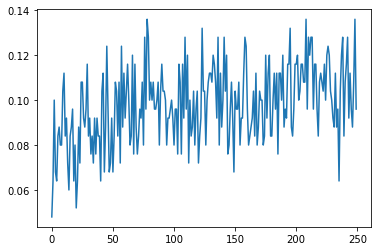

In [227]:
import matplotlib.pyplot as plt
plt.plot(np.arange(250),[np.sum(i==1)/250 for i in np.split(np.array(count), 250)])